In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import sys
# You need to have PatchSim installed in your working environment 
# alternativelly you can add path local clone path for https://github.com/NSSAC/PatchSim :
# sys.path.append('/path/to/PatchSim/') 
import patchsim as sim

# Update with path to local clone path for https://github.com/NSSAC/patchflow-data/ if from outside of examples
pfdir = '../data/' 

### Updating population and network paths in sample config

In [2]:
country = 'IND'
adm = 2
rad = 0.01
network = pfdir+'{}/{}_admin{}_radiation_constant_{:.02f}_normalized.patchsim'.format(country,country,adm,rad)
pop = pfdir+'{}/{}_admin{}_population.patchsim'.format(country,country,adm)

cfg = sim.read_config('patchsim_example.cfg')
cfg['PatchFile'] = pop
cfg['NetworkFile'] = network

### Seeding 100 cases on day 0 in the top 5 populated patches

In [3]:
df = pd.read_csv(pop,delim_whitespace=True,names=['patch','pop'])
seed = df.sort_values('pop',ascending=False).head(5)
seed['seed'] = 100
seed['tick'] = 0
seed[['tick','patch','seed']].to_csv('test_seed.txt',sep=' ',header=None,index=None)

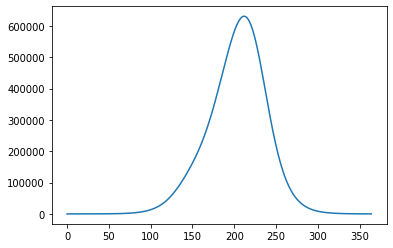

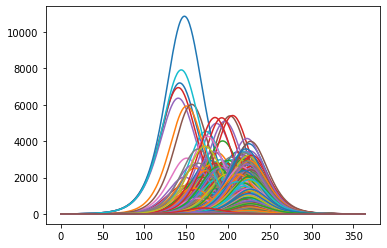

In [4]:
out = sim.run_disease_simulation(cfg,return_epi=True)
out.sum().plot()
out.T.plot(legend=None)